# COVID 19 - STIMULUS MEASUREMENT & OPTIMIZATION

## OBJECTIVES
1. DASHBOARD OF KEY METRICS
2. VISUALUZATIONS FOR AVAILABLE METRICS
3. ALERT AND CONTROLS
4. OPTIMIZATION OF STIMULUS

## DATA SOURCES

[FRED Federal Reserve Bank of St Louis](https://fred.stlouisfed.org/)

[FRED 3rd party API for Python](https://github.com/mortada/fredapi)

## TWILIO API for AUTOMATED ALERTS

[TWILIO](https://www.twilio.com/)

## DATA DICTIONARY

|Field      | Description                                | Update Frequency    |
|-----------|:------------------------------------------:|:-------------------:|
|REALGDP    |Real Gross Domestic Product                 |Quarterly            |
|UNRATE     |Unemployment Rate                           |Monthly              |
|FEDFUNDSRT |Effective Federal Funds Rate                |Monthly              |
|CPI        |Consumer Price Index for All Urban Consumers|Monthly              |
|GDP        |Gross Domestic Product                      |Quarterly            |
|MTG30      |30-Year Fixed Rate Mortgage Average in the United States|Weekly   |
|INITCLMS   |Initial Claims                              |Weekly               |
|CASESHILLER|S&P/Case-Shiller U.S. National Home Price Index|Monthly           |
|DEBTTOGDP  |Total Public Debt as Percent of Gross Domestic Product|Quarterly  |
|INFLTN     |10-Year Breakeven Inflation Rate             |Yearly              |
|SP500      |S&P 500 Index                                 |Daily               |
|BNDYLD     |Moodys Seasoned Aaa Corporate Bond Yield     |Daily               |
|PCE        |Personal Consumption Expenditures            |Monthly             |
|HSEPRCS    |Median Sales Price of Houses Sold for the United States|Quarterly |
|RCSSNPROB  |Smoothed U.S. Recession Probabilities        |Monthly             |
|VHCLSLS    |Total Vehicle Sales                          |Monthly             |
|PSAVERT    |Personal Saving Rate                         |Monthly             |
|TTLDEBT    |Federal Debt: Total Public Debt              |Quarterly           |
|DJIA       |Dow Jones Industrial Average                 |Daily               |
|RLGDPPERCPTA|Real gross domestic product per capita      |Quarterly           |
|INSUNCLM   |Continued Claims (Insured Unemployment)      |Weekly              |
|BNKPRMRT   |Bank Prime Loan Rate                         |Monthly             |
    

# IMPORTS

In [1]:
# General Imports

import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import json
import os

In [2]:
# Imports to obtain data from FRED API

from dotenv import load_dotenv
from fredapi import Fred

In [3]:
# Download the helper library from https://www.twilio.com/docs/python/install

from twilio.rest import Client

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
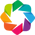

In [4]:
# Imports for visualizations

import hvplot.pandas

import holoviews as hv
hv.extension('bokeh')

import panel as pn
pn.extension()

import panel.widgets as pnw
import plotly.express as px

import param

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [5]:
# Extract API keys from environment variables (NEED TO FIX THIS)
fred = os.getenv('FRED_API_KEY')
print(fred)

None


In [6]:
# Manual method for Fred API
fred = Fred(api_key='51a3310fe6b34313e98eac05fcf2f0da')
print(fred)

In [7]:
# Obtain several data elements from FRED API

REALGDP = fred.get_series('GDPC1')                 # QUARTERLY
UNRATE = fred.get_series('UNRATE')                 # MONTHLY
FEDFUNDSRT = fred.get_series('FEDFUNDS') 
CPI = fred.get_series('CPIAUCSL')
GDP = fred.get_series('GDP')                       # QUARTERLY
MTG30 = fred.get_series('MORTGAGE30US')
INITCLMS = fred.get_series('ICSA')
CASESHILLER = fred.get_series('CSUSHPISA')
DEBTTOGDP = fred.get_series('GFDEGDQ188S')         # QUARTERLY
INFLTN = fred.get_series('FPCPITOTLZGUSA')         # YEARLY
SP500 = fred.get_series('SP500')
BNDYLD = fred.get_series('AAA')
PCE = fred.get_series('PCE')
HSEPRCS = fred.get_series('MSPUS')
RCSSNPROB = fred.get_series('RECPROUSM156N')
VHCLSLS = fred.get_series('TOTALSA')
PSAVERT = fred.get_series('PSAVERT')
TTLDEBT = fred.get_series('GFDEBTN')               # QUARTERLY
DJIA = fred.get_series('DJIA')
RLGDPPERCPTA = fred.get_series('A939RX0Q048SBEA')  # QUARTERLY
INSUNCLMS = fred.get_series('CCSA')                # WEEKLY
BNKPRMRT = fred.get_series('MPRIME')

In [8]:
# Obtain data for regions / states from FRED API

URFL = fred.get_series('FLUR')
URCA = fred.get_series('CAUR')
UROH = fred.get_series('OHUR')
URNY = fred.get_series('NYUR')
URTX = fred.get_series('TXUR')
URMI = fred.get_series('MIUR')
URPA = fred.get_series('PAUR')
URNC = fred.get_series('NCUR')
URTN = fred.get_series('TNUR')
URWI = fred.get_series('WIUR')
UROR = fred.get_series('ORUR')
URAL = fred.get_series('ALUR')
URGA = fred.get_series('GAUR')
URNV = fred.get_series('NVUR')
URMO = fred.get_series('MOUR')
URKY = fred.get_series('KYUR')
URMA = fred.get_series('MAUR')
URMN = fred.get_series('MNUR')
URSC = fred.get_series('SCUR')
URWA = fred.get_series('WAUR')
URLA = fred.get_series('LAUR')
URCO = fred.get_series('COUR')
URWV = fred.get_series('WVUR')
URIN = fred.get_series('INUR')
URKS = fred.get_series('KSUR')
URHI = fred.get_series('HIUR')
URNJ = fred.get_series('NJUR')
UROK = fred.get_series('OKUR')
URAZ = fred.get_series('AZUR')
URNM = fred.get_series('NMUR')
URAK = fred.get_series('AKUR')
URMD = fred.get_series('MDUR')
URCT = fred.get_series('CTUR')
URME = fred.get_series('MEUR')
URAR = fred.get_series('ARUR')
URIA = fred.get_series('IAUR')
URND = fred.get_series('NDUR')
URMS = fred.get_series('MSUR')
URID = fred.get_series('IDUR')
URSD = fred.get_series('SDUR')
URWY = fred.get_series('WYUR')
URNH = fred.get_series('NHUR')
URMT = fred.get_series('MTUR')
URNE = fred.get_series('NEUR')
URUT = fred.get_series('UTUR')
URDC = fred.get_series('DCUR')
URRI = fred.get_series('RIUR')
URDE = fred.get_series('DEUR')
URVT = fred.get_series('VTUR')

URVT.head()

1976-01-01    8.7
1976-02-01    8.7
1976-03-01    8.7
1976-04-01    8.7
1976-05-01    8.6
dtype: float64

In [9]:
REALGDP.head()

1947-01-01    2033.061
1947-04-01    2027.639
1947-07-01    2023.452
1947-10-01    2055.103
1948-01-01    2086.017
dtype: float64

In [10]:
# COMBINED DATAFRAME FOR QUARTERY METRICS

quarterly_df = pd.concat([REALGDP, GDP, DEBTTOGDP, TTLDEBT, RLGDPPERCPTA], axis = 1)

In [11]:
quarterly_df.head()

0        1   2   3        4
1946-01-01       NaN      NaN NaN NaN      NaN
1946-04-01       NaN      NaN NaN NaN      NaN
1946-07-01       NaN      NaN NaN NaN      NaN
1946-10-01       NaN      NaN NaN NaN      NaN
1947-01-01  2033.061  243.164 NaN NaN  14203.0

In [12]:
quarterly_df.index.names=['date']

In [13]:
quarterly_df.head()

0        1   2   3        4
date                                          
1946-01-01       NaN      NaN NaN NaN      NaN
1946-04-01       NaN      NaN NaN NaN      NaN
1946-07-01       NaN      NaN NaN NaN      NaN
1946-10-01       NaN      NaN NaN NaN      NaN
1947-01-01  2033.061  243.164 NaN NaN  14203.0

In [14]:
quarterly_df.columns = (['REAL GDP', 'GDP', 'DEBT TO GDP', 'TOTAL DEBT', 'REAL GDP PER CAPITA'])

In [15]:
quarterly_df['TOTAL DEBT'][-2]

23201380.0

In [16]:
# Calculate median and std deviations for quarterly data

median_qly = quarterly_df.median()
std1_qly = quarterly_df.std()
std2_qly = 2*quarterly_df.std()
std3_qly = 3*quarterly_df.std()

print(median_qly, std1_qly, std2_qly, std3_qly)

REAL GDP               7.189896e+03
GDP                    3.689179e+03
DEBT TO GDP            5.613866e+01
TOTAL DEBT             4.203794e+06
REAL GDP PER CAPITA    3.064700e+04
dtype: float64 REAL GDP               5.180511e+03
GDP                    6.347652e+03
DEBT TO GDP            2.378080e+01
TOTAL DEBT             6.448458e+06
REAL GDP PER CAPITA    1.352210e+04
dtype: float64 REAL GDP               1.036102e+04
GDP                    1.269530e+04
DEBT TO GDP            4.756160e+01
TOTAL DEBT             1.289692e+07
REAL GDP PER CAPITA    2.704420e+04
dtype: float64 REAL GDP               1.554153e+04
GDP                    1.904296e+04
DEBT TO GDP            7.134241e+01
TOTAL DEBT             1.934537e+07
REAL GDP PER CAPITA    4.056630e+04
dtype: float64


In [17]:
quarterly_stacked_df = quarterly_df.stack()

In [18]:
quarterly_stacked_df.head()

date                           
1947-01-01  REAL GDP                2033.061
            GDP                      243.164
            REAL GDP PER CAPITA    14203.000
1947-04-01  REAL GDP                2027.639
            GDP                      245.968
dtype: float64

In [19]:
quarterly_stacked_df.index.names=['date', 'quarterly']

In [20]:
quarterly_stacked_df.head()

date        quarterly          
1947-01-01  REAL GDP                2033.061
            GDP                      243.164
            REAL GDP PER CAPITA    14203.000
1947-04-01  REAL GDP                2027.639
            GDP                      245.968
dtype: float64

In [21]:
# Median, 1 std deviations, 2 std deviations, 3 std deviations for Quarterly Metrics

print(median_qly, std1_qly, std2_qly, std3_qly)

REAL GDP               7.189896e+03
GDP                    3.689179e+03
DEBT TO GDP            5.613866e+01
TOTAL DEBT             4.203794e+06
REAL GDP PER CAPITA    3.064700e+04
dtype: float64 REAL GDP               5.180511e+03
GDP                    6.347652e+03
DEBT TO GDP            2.378080e+01
TOTAL DEBT             6.448458e+06
REAL GDP PER CAPITA    1.352210e+04
dtype: float64 REAL GDP               1.036102e+04
GDP                    1.269530e+04
DEBT TO GDP            4.756160e+01
TOTAL DEBT             1.289692e+07
REAL GDP PER CAPITA    2.704420e+04
dtype: float64 REAL GDP               1.554153e+04
GDP                    1.904296e+04
DEBT TO GDP            7.134241e+01
TOTAL DEBT             1.934537e+07
REAL GDP PER CAPITA    4.056630e+04
dtype: float64


In [22]:
# COMBINED DATAFRAME FOR MONTHLY METRICS

monthly_df = pd.concat([UNRATE,FEDFUNDSRT,CPI,CASESHILLER,PCE,HSEPRCS,RCSSNPROB,VHCLSLS,PSAVERT,BNKPRMRT], axis = 1)

In [23]:
monthly_df.index.names=['date']

In [24]:
monthly_df.columns = ['Unemployment%', 'FedFunds%', 'CPI', 'CASESHILLER', 'PCE', 'HOUSING PRICES','RECESSION PROB',
               'Vehicle Sales', 'Pers Savings%','Bank Prime%']

In [25]:
monthly_stacked_df = monthly_df.stack()

In [26]:
monthly_stacked_df.index.names=['date', 'monthly']

In [27]:
monthly_stacked_df.tail()

date        monthly      
2020-03-01  Vehicle Sales    11.742
            Pers Savings%    13.100
            Bank Prime%       3.780
2020-04-01  FedFunds%         0.050
            Bank Prime%       3.250
dtype: float64

In [28]:
# Jobless claims

INITCLMS.tail()

2020-04-04    6615000.0
2020-04-11    5237000.0
2020-04-18    4442000.0
2020-04-25    3846000.0
2020-05-02    3169000.0
dtype: float64

In [29]:
INITCLMS[-5]

6615000.0

In [30]:
# Calculate median and std deviations for quarterly data

median_clms = INITCLMS.median()
std1_clms = INITCLMS.std()
std2_clms = 2 * INITCLMS.std()
std3_clms = 3 * INITCLMS.std()

print(median_clms, std1_clms, std2_clms, std3_clms)

343000.0 249229.7776852782 498459.5553705564 747689.3330558346


In [31]:
# COMBINED DATAFRAME FOR UNEMPLOYMENT BY STATE METRICS

urstates_df = pd.concat([URFL, URCA, UROH, URNY, URTX, URMI, URPA, URNC, URTN, URWI, UROR, URAL, URGA, URNV, URMO,
                 URKY, URMA, URMN, URSC, URWA, URLA, URCO, URWV, URIN, URKS, URHI, URNJ, UROK, URAZ, URNM,
                 URAK, URMD, URCT, URME, URAR, URIA, URND, URMS, URID, URSD, URWY, URNH, URMT, URNE, URUT,
                 URDC, URRI, URDE, URVT], axis = 1)

In [32]:
urstates_df.head()

0    1    2     3    4    5    6    7    8    9   ...   39   40  \
1976-01-01  9.6  9.1  8.1  10.3  5.8  9.9  8.1  6.5  6.0  5.8  ...  3.2  4.1   
1976-02-01  9.6  9.1  8.1  10.3  5.9  9.9  8.1  6.5  6.0  5.8  ...  3.2  4.1   
1976-03-01  9.5  9.0  8.1  10.2  5.9  9.9  8.1  6.4  6.0  5.7  ...  3.1  4.2   
1976-04-01  9.3  9.0  8.0  10.2  5.9  9.8  8.2  6.3  5.9  5.6  ...  3.1  4.1   
1976-05-01  9.1  8.9  7.9  10.2  5.9  9.6  8.1  6.1  5.8  5.5  ...  3.0  4.1   

             41   42   43   44   45   46   47   48  
1976-01-01  6.8  5.9  3.3  5.8  9.0  8.1  7.7  8.7  
1976-02-01  6.8  5.9  3.3  5.8  9.0  8.1  7.7  8.7  
1976-03-01  6.8  5.8  3.3  5.8  9.0  8.1  7.7  8.7  
1976-04-01  6.7  5.9  3.2  5.7  8.8  8.1  8.0  8.7  
1976-05-01  6.6  5.9  3.1  5.6  8.7  8.0  8.4  8.6  

[5 rows x 49 columns]

In [33]:
urstates_df.index.names=['date']

In [34]:
urstates_df.head()

0    1    2     3    4    5    6    7    8    9   ...   39   40  \
date                                                           ...             
1976-01-01  9.6  9.1  8.1  10.3  5.8  9.9  8.1  6.5  6.0  5.8  ...  3.2  4.1   
1976-02-01  9.6  9.1  8.1  10.3  5.9  9.9  8.1  6.5  6.0  5.8  ...  3.2  4.1   
1976-03-01  9.5  9.0  8.1  10.2  5.9  9.9  8.1  6.4  6.0  5.7  ...  3.1  4.2   
1976-04-01  9.3  9.0  8.0  10.2  5.9  9.8  8.2  6.3  5.9  5.6  ...  3.1  4.1   
1976-05-01  9.1  8.9  7.9  10.2  5.9  9.6  8.1  6.1  5.8  5.5  ...  3.0  4.1   

             41   42   43   44   45   46   47   48  
date                                                
1976-01-01  6.8  5.9  3.3  5.8  9.0  8.1  7.7  8.7  
1976-02-01  6.8  5.9  3.3  5.8  9.0  8.1  7.7  8.7  
1976-03-01  6.8  5.8  3.3  5.8  9.0  8.1  7.7  8.7  
1976-04-01  6.7  5.9  3.2  5.7  8.8  8.1  8.0  8.7  
1976-05-01  6.6  5.9  3.1  5.6  8.7  8.0  8.4  8.6  

[5 rows x 49 columns]

In [35]:
urstates_df.columns = ['FL','CA','OH','NY','TX','MI','PA','NC','TN','WI','OR','AL','GA','NV','MO','KY','MA','MN',
               'SC','WA','LA','CO','WV','IN','KS','HI','NJ','OK','AZ','NM','AK','MD','CT','ME','AR','IA',
               'ND','MS','ID','SD','WY','NH','MT','NE','UT','DC','RI','DE','VT']

In [36]:
urstates_df.head()

FL   CA   OH    NY   TX   MI   PA   NC   TN   WI  ...   SD   WY  \
date                                                           ...             
1976-01-01  9.6  9.1  8.1  10.3  5.8  9.9  8.1  6.5  6.0  5.8  ...  3.2  4.1   
1976-02-01  9.6  9.1  8.1  10.3  5.9  9.9  8.1  6.5  6.0  5.8  ...  3.2  4.1   
1976-03-01  9.5  9.0  8.1  10.2  5.9  9.9  8.1  6.4  6.0  5.7  ...  3.1  4.2   
1976-04-01  9.3  9.0  8.0  10.2  5.9  9.8  8.2  6.3  5.9  5.6  ...  3.1  4.1   
1976-05-01  9.1  8.9  7.9  10.2  5.9  9.6  8.1  6.1  5.8  5.5  ...  3.0  4.1   

             NH   MT   NE   UT   DC   RI   DE   VT  
date                                                
1976-01-01  6.8  5.9  3.3  5.8  9.0  8.1  7.7  8.7  
1976-02-01  6.8  5.9  3.3  5.8  9.0  8.1  7.7  8.7  
1976-03-01  6.8  5.8  3.3  5.8  9.0  8.1  7.7  8.7  
1976-04-01  6.7  5.9  3.2  5.7  8.8  8.1  8.0  8.7  
1976-05-01  6.6  5.9  3.1  5.6  8.7  8.0  8.4  8.6  

[5 rows x 49 columns]

In [37]:
urstates_stacked_df = urstates_df.stack()

In [38]:
urstates_stacked_df.index.names=['date', 'state']

In [39]:
urstates_stacked_df.tail()

date        state
2020-03-01  UT       3.6
            DC       6.0
            RI       4.6
            DE       5.1
            VT       3.2
dtype: float64

## VISUALIZATIONS

In [40]:
# QUARTERLY PLOTS 

#columns = [median_qly['REAL GDP']]
#REAL_GDP = quarterly_df.hvplot(kind = "line", y = columns)
#REAL_GDP

In [41]:
# QUARTERLY PLOTS 

GDP = quarterly_df.hvplot(kind = "line", y = "GDP")

In [42]:
# QUARTERLY PLOTS 

quarterly_df.hvplot(kind = "line", y = "DEBT TO GDP")

:Curve   [date]   (DEBT TO GDP)

In [43]:
# QUARTERLY PLOTS 

quarterly_df.hvplot(kind = "line", y = "TOTAL DEBT")

:Curve   [date]   (TOTAL DEBT)

In [44]:
# QUARTERLY PLOTS 

quarterly_df.hvplot(kind = "line", y = "REAL GDP PER CAPITA")

:Curve   [date]   (REAL GDP PER CAPITA)

In [45]:
# QUARTERLY PLOTS 

quarterly_metrics = quarterly_stacked_df.hvplot(kind = "line", groupby="quarterly")
quarterly_metrics

:DynamicMap   [quarterly]
   :Curve   [date]   (0)

In [46]:
# MONTHLY PLOTS 

#df2.hvplot(kind = "line", y = "'Unemployment%', 'FedFunds%', 'CPI', 'CASESHILLER', 'PCE', 'HOUSING PRICES','RECESSION PROB',
#               'Vehicle Sales', 'Pers Savings%', 'SURORDEF', 'Bank Prime%'")

In [47]:
# MONTHLY PLOTS 

Unemployment = monthly_df.hvplot(kind = "line", y = "Unemployment%")
Unemployment

:Curve   [date]   (Unemployment%)

In [48]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "FedFunds%")

:Curve   [date]   (FedFunds%)

In [49]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "CPI")

:Curve   [date]   (CPI)

In [50]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "CASESHILLER")

:Curve   [date]   (CASESHILLER)

In [51]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "PCE")

:Curve   [date]   (PCE)

In [52]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "HOUSING PRICES")

:Curve   [date]   (HOUSING PRICES)

In [53]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "RECESSION PROB")

:Curve   [date]   (RECESSION PROB)

In [54]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "Vehicle Sales")

:Curve   [date]   (Vehicle Sales)

In [55]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "Pers Savings%")

:Curve   [date]   (Pers Savings%)

In [56]:
# MONTHLY PLOTS 

monthly_df.hvplot(kind = "line", y = "Bank Prime%")

:Curve   [date]   (Bank Prime%)

In [57]:
# MONTHLY PLOTS 

monthly_metrics = monthly_stacked_df.hvplot(kind = "line", groupby= "monthly")
monthly_metrics

:DynamicMap   [monthly]
   :Curve   [date]   (0)

In [58]:
# Initial jobless claims 

initial_claims = INITCLMS.hvplot(kind = "line")
initial_claims

:Curve   [index]   (0)

In [59]:
# UNEMPLOYMENT FOR STATES

urstates_df.hvplot(kind = "line")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [60]:
# UNEMPLOYMENT FOR STATES

ur_metrics = urstates_stacked_df.hvplot(kind = "line", groupby="state")
ur_metrics

:DynamicMap   [state]
   :Curve   [date]   (0)

In [61]:
# UNEMPLOYMENT FOR STATES

urstates_df.hvplot(kind = "line", y ="CA")

:Curve   [date]   (CA)

In [62]:
# UNEMPLOYMENT FOR STATES

urstates_df.hvplot(kind = "line", y ="NC")

:Curve   [date]   (NC)

In [63]:
urstates_df['NC'][-1]

4.4

In [64]:
# UNEMPLOYMENT FOR STATES

urstates_df.hvplot(kind = "line", y ="NY")

:Curve   [date]   (NY)

## AUTOMATED ALERTS using TWILIO API

In [65]:
# Use case 1: Alert to President/Congress if Debt increased too much

if quarterly_df['DEBT TO GDP'][-2] > 1000:
    account_sid = 'ACd60ff66e0c982ad5f79f18f40321dc7d'
    auth_token = '823a1b5e297ed0ca0b46697988debafd'
    client = Client(account_sid, auth_token)

    message = client.messages \
       .create(
           body='ALERT: DEBT TO GDP > 100%',
           from_='+19803994631',
           to='+17047706967'
           )

    print(message.sid)

In [66]:
# Use case 1b: Alert to President/Congress if Debt increased too much

#if quarterly_df['TOTAL DEBT'][-2] > 20000000:
#    account_sid = 'ACd60ff66e0c982ad5f79f18f40321dc7d'
#    auth_token = '823a1b5e297ed0ca0b46697988debafd'
#    client = Client(account_sid, auth_token)

#    numbers_to_message = ['+17047706967', '+17047706967']
#    for number in numbers_to_message:
#        client.messages.create(
#           body='ALERT: TOTAL DEBT > $20 TRILLION',
#           from_='+19803994631',
#           to='number'
#           )

#        print(message.sid)

In [67]:
# Use case2: Alert to Governor's office if Unemployment jumped up too high

if urstates_df['NC'][-1] > 6:
    account_sid = 'ACd60ff66e0c982ad5f79f18f40321dc7d'
    auth_token = '823a1b5e297ed0ca0b46697988debafd'
    client = Client(account_sid, auth_token)

    message = client.messages \
       .create(
           body='ALERT: NC Unemployment% spiked above 6%',
           from_='+19803994631',
           to='+17047706967'
           )

    print(message.sid)

In [68]:
# Use case3: Alert to Mayor's office if Weekly jobless claims spiked too high

if INITCLMS[-1] > 5000000:
    account_sid = 'ACd60ff66e0c982ad5f79f18f40321dc7d'
    auth_token = '823a1b5e297ed0ca0b46697988debafd'
    client = Client(account_sid, auth_token)

    message = client.messages \
       .create(
           body='ALERT: Initial Weekly Jobless Claims > 5M ',
           from_='+19803994631',
           to='+17047706967'
           )

    print(message.sid)

# DASHBOARD

In [69]:
# PANEL

col1 = pn.Column("##CARES ACT STIMULUS", "### Evaluate current Stimulus for COVID-19", Unemployment)
col2 = pn.Column("#CARES ACT STIMULUS - DASHBOARD", GDP)
col3 = pn.Column("#QUARTERLY METRICS", quarterly_metrics)
col4 = pn.Column("#MONTHLY METRICS", monthly_metrics)
col5 = pn.Column("#UNEMPLOYMENT DETAIL", ur_metrics)
col6 = pn.Column("#JOBLESS CLAIMS", initial_claims )
col7 = pn.Column("#DATA DICTIONARY")

In [70]:
dashboard = pn.Tabs(("CARES ACT - STIMULUS", col1), ("CARES ACT - STIMULUS: DASHBOARD", col2), ("QUARTERLY METRICS", col3), ("MONTHLY METRICS", col4), ("UNEMPLOYMENT DETAIL", col5), ("JOBLESS CLAIMS", col6), ("DATA DICTIONARY"), col7)

In [71]:
dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] HoloViews(Curve)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(Curve)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='quarterly', options=['REAL GDP', 'GDP', ...], value='REAL GDP', width=250)
                [1] VSpacer()
    [3] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='monthly', options=['CPI', 'Unemployment%', ...], value='CPI', width=250)
                [1] VSpacer()
    [4] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='state', options=['FL', 'CA', 'OH', ...], value='FL', width=250)
                [1] VSpacer()
    [5] Column
        [0] Markdown(str)
        [1] HoloViews(Curve)
    [6] Markdown(str)
    [7] Column
        [0] Markdown(str)